---
title: Logistic Regression
tags: 小书匠,lr,cross_entropy,job,Logistic,LR,note|笔记,notes,sigmoid,softmax
grammar_cjkRuby: true
renderNumberedHeading: true
---

[toc]

# Logistic Regression

## 1. LR的损失函数公式

多分类问题的损失函数

从单样本二分类慢慢过渡。

### 单样本二分类

$$
L(y_i, \hat{y}_i) = - y_i \log \frac{1}{1 + \exp x_i^T \beta } - (1-y_i) \log \frac{\exp x_i^T \beta }{1 + \exp x_i^T \beta }
$$ 

### 单样本多分类

$$
L(y_i, \hat{y}_i) = - y_{i0} \log \frac{1}{1 + \sum_{i=1}^{K-1} \exp x_i^T \beta_i } - y_{i1} \log \frac{\exp x_i^T \beta_1 }{1 + \sum_{i=1}^{K-1} \exp x_i^T \beta_1 }  \ldots - y_{i,K-1} \log \frac{\exp x_i^T \beta_{K-1} }{1 + \sum_{i=1}^{K-1} \exp x_i^T \beta_{K-1} } 
$$ 

### 多样本多分类

$$
L(y, \hat{y}) = \sum_{i=1}^{N}  \left(- y_{i0} \log \frac{1}{1 + \sum_{i=1}^{K-1} \exp x_i^T \beta_i }  - y_{i1} \log \frac{\exp x_i^T \beta_1 }{1 + \sum_{i=1}^{K-1} \exp x_i^T \beta_1 }  \ldots - y_{i,K-1} \log \frac{\exp x_i^T \beta_{K-1} }{1 + \sum_{i=1}^{K-1} \exp x_i^T \beta_{K-1} } \right)
$$ 

## 2. LR 的 损失函数公式的推导

### 统计视角

#### 根据极大似然估计可以得到

假设 $y \sim Bernoulli(\pi(x))$ ，

其中 $\pi(x)$ 是关于 $x$  的线性函数。参数为 $\beta$ 即

$$
\pi(x;\beta ) = x^T \beta
$$ 

则样本 $i$ 的似然函数为

$$
L(x_i;\beta) = \pi_i^{y_i} (1-\pi_i)^{1-y_i}
$$ 

取对数，仍然记作 $L$ 

$$
\begin{aligned}
    L(x_i;\beta) &= y_i \log \pi_i + (1-y_i) \log (1-\pi_i) \\
    &= y_i \log x_i^T \beta + (1-y_i) \log (1-x_i^T \beta ) \\
\end{aligned}
$$ 

#### 统计视角2

上面的是一种比较统计的视角，其中引入了 bernoulli 分布（如果是多分类就是 multinominal 分布）。

还有一种常见的思路，这种思路没有显式提到概率分布，他们就直接给出一个式子

$$
\begin{aligned}
p(x_i) = \frac{sofmax(f(x_i | \theta))}{\sum_{j=1}^n sofmtax(f(x_j|\theta)}
\end{aligned}
$$

### 信息论角度：

真实分布: $y \sim Bernoulli(\pi(x))$ ，

关于样本分布，理解起来可能有点费劲：
1. 若样本 $y_i = 1$ ，则表明 $P(y_i=1)=1, P(y_i=0)=0$
2. 若样本 $y_i = 0$ ，则表明 $P(y_i=1)=0, P(y_i=1)=1$

即 $P(y_i=1)=y_i, P(y_i=0)=1-y_i$ 

因此计算真实分布和样本分布的交叉熵

$$
L(y_i, \hat{y}_i) = y_i \log \pi_i  + (1-y_i) \log (1 - \pi_i)
$$ 


（来自李宏毅ppt，注意$\hat{y}$表示的是样本值，和一般的表示方法不同）
![picture from 李宏毅](https://gitee.com/EdwardElric_1683260718/picture_bed/raw/master/img/20200428202534.png)

## 2. 为什么LR不使用MSE做损失函数 / 为什么使用交叉熵做损失函数

### 似然函数的角度

假设有 n 个样本 $\{x_{i}, y_i\}$

### 信息论的角度


$$
H(p, q) = \sum_{x} p(x) log \frac{1}{q(x)}
$$

KL 散度 = 交叉熵 - 熵，优化交叉熵相当于优化两个分布之间的距离。

### 梯度下降的角度

因为当前值远离最优解时，梯度小，不容易收敛。

预测值为

$$
f(x) = \frac{1}{1 + \exp (-x^T \beta )}
$$ 

如果取 MSE 为损失函数，有

$$
L = \sum_{i=1}^{N} (y_i - f(x_i))^2
$$ 

对 $\beta$  求导

$$
\begin{aligned}
    \frac{\partial L}{\partial  \beta }  = -2 \sum_{i=1}^{N} (y - f(x_i)) f(x_i) (1 - f(x_i)) x_i
\end{aligned}
$$ 

假设 $y_i=1$ 
1. 若 $f(x_i)=1$ 时，上式为 0，因此梯度不会更新。这是合理的，因为已经到达了最优值。
2. 若 $f(x_i)=0$ 时，上式为 0，因此梯度不会更新。这是不合理的，因为明明估计是很差的，但是梯度却为0，因此参数无法更新，所以模型难以优化。

## 3. 为什么用 logistic 函数作为link function？

logistic函数：

$$
f(x) = \frac{1}{1+ e^{-x}}
$$

1. 定义域为 $(- \infty, + \infty)$，值域为 $(0, 1)$，因此可以压缩将任意值压缩到$(0, 1)$，形成一个概率。
2. 光滑，容易求导。

导数满足 $f'(x) = f(x)(1-f(x))$

## 4. LR的推导过程

Motivation: 如何用线性回归来解决分类问题？

1. 不是预测分类本身，而是预测概率。

线性回归不能保证预测出来的是概率，因此我们对线性回归的结果$y=X\beta$上面再套一个非线性函数将其压缩到$(0,1)$，因此会得到一个概率。

这个非线性函数是 sigmoid 函数，因此得到:

$$
y = \frac{1}{1 + e ^{-X\beta}}
$$

![\picture goes here](https://gitee.com/EdwardElric_1683260718/picture_bed/raw/master/img/20200428210052.png)


## 5. LR如何解决共线性，为什么深度学习不强调

加二阶正则项，加二阶正则项相当于进行了 guassian 分布的先验。

共线性是源于线性模型，而深度学习并不是线性模型。所以说深度学习并不需要进行解决共线性问题。

## 6. LR如何防止过拟合

加正则项

## 7. LR分布式训练怎么做

## 9. LR 的随机梯度实现

以多样本二分类为例子。

$$
\hat{y} = \frac{1}{ 1 + exp(-x^T \beta + b)}
$$

$$
L = \sum_{i=1}^N l( \hat{y_i}, y_i)
$$ 

其中 

$$
\begin{aligned}
l( \hat{y}, y) &= - \left(y_i \log \hat{y_i} + (1 - y_i) log (1 - \hat{y_i}) \right) \\
&= -\left( y_i \log \frac{1}{1  + \exp (-\left( x_i^T \beta + b \right) )} + (1- y_i) \log \frac{ \exp(-\left( x_i^T \beta + b \right) )}{1 + \exp(-\left( x_i^T \beta + b \right) )}\right)  \\
&=  - \left(y_i \log \frac{1}{1 + \exp(-\left( x_i^T \beta + b \right) )} + \left( 1 - y_i \right) \log \exp\left( -\left( x_i^T \beta +b  \right) \right) + \left( 1 - y_i \right) \log \frac{1}{1 + \exp\left( -\left( x_i^T \beta + b  \right) \right) } \right) \\
&=  - \left( \log \frac{1}{1 + exp(-\left( x_i^T \beta + b \right) )} + \left( 1 - y_i \right) \left( -\left( x_i^T \beta + b \right)  \right)  \right) \\
&= -\left( \left( 1 - y_i\right) \left( -\left( x_i^T \beta + b  \right) \right) - \log (1 + \exp \left(-\left( x ^T \beta + b  \right) \right)  \right)  \\
&=  \log \left(1 + \exp \left(-\left( x ^T \beta + b  \right) \right)  \right) + \left( 1 - y_i\right) \left( x_i^T \beta + b  \right)
 .\end{aligned}
$$ 

$$
\begin{aligned}
\frac{\partial l\left( \hat{y_i}, y_i \right) }{\partial \beta}  &= -\left( - \left( 1 - y_i \right) x_i  + \frac{1}{1  + \exp (-x_i^T \beta + b)} \exp\left( -x_i^T \beta + b \right) x_i \right)\\
&= - \left( -\left( 1 - y_i \right) x_i + \left( 1 - \hat{y_i}\right) x_i  \right)  \\
&= - \left( y_i - \hat{y_i} \right)x_i  \\
&= \left( \hat{y_i} - y_i \right) x_i  \\
.\end{aligned}
$$

$$
\begin{aligned}
    \frac{\partial l\left( \hat{y_i}, y_i \right) }{\partial b}  &= - \left( - \left( 1 - y_i \right) + \frac{\exp\left( -x ^T \beta + b \right) }{1 + \exp \left( -x ^T \beta + b \right) } \right)  \\
    &= - \left( - \left( 1 - y_i \right) + \left( 1 - \hat{y}_i \right)  \right)  \\
    &= - \left( y_i - \hat{y}_i \right)  \\
    &= \hat{y}_i - y_i \\
.\end{aligned}
$$ 




## 10. 什么是线性模型？ LR 线性模型吗？

参考 [ 2 ]

线性模型的线性是指参数是以线性组合的方式结合起来的。对于分类问题来说，线性模型指的是决策边界是线性的。

决策边界是指分类为使 p(y=1|x) = p(y=0|x) 相等的那条线。对于 LR 模型来说，决策边界的推导如下：

$$
P(y=1|x)= \frac{1}{1 + \exp(-(x^T \beta + b))}
$$

因此

$$
\begin{aligned}
P(y=1|x) &= P(y=0|x) \\
\frac{1}{1 + \exp(-(x^T \beta + b))} &= \frac{exp(-(x^T \beta + b))}{1 + \exp(-(x^T \beta + b))} \\
1 &= \exp(-(x^T \beta + b)) \\
0 &= -(x^T \beta + b) \\
\end{aligned}
$$

即决策边界为 
$$x^T \beta + b = 0$$
这是线性的，因此，LR 是线性模型。

## 11. Tensorflow 写出 LR 的训练过程

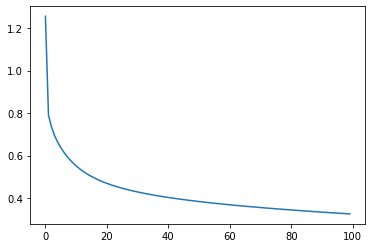

In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pdb

iris = load_iris()
x = iris['data'].astype(np.float32)
y = iris['target'].astype(np.int32)

def get_weight(shape):
    return tf.Variable(tf.random.normal(shape), dtype=tf.float32)

def get_bias(shape):
    return tf.Variable(tf.zeros(shape), dtype=tf.float32)

input_size = 4
output_size = 3

w = get_weight((input_size, output_size))
b = get_bias((1, output_size))

def forward(x, w, b):
    return tf.matmul(x, w) + b

n_epochs = 100
optimizer = tf.keras.optimizers.SGD(0.1)
loss_val = []
for epoch in range(n_epochs):
    with tf.GradientTape() as tape:
        logits = forward(x, w, b)
        loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits))
    grads = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(grads, [w, b]))
    loss_val.append(loss.numpy())
plt.plot(loss_val)

## 12. lr 适合什么样的数据 / （为什么 lr 适合处理离散数据）？

需要明确一点。工业界一般不会直接使用连续特征来训练 lr，一般都会离散化之后来训练 lr。

1. 稀疏向量的乘法计算更容易计算。实际上都不需要进行 one-hot 操作，直接使用 labelencoder + embedding_lookup 就可以实现。

2. 可以增强拟合能力。做完 one-hot 之后，每个类别都会有一个权重，可以**引入非线性**大大增强模型的表达能力。否则，多个类别公用一个权重。

关于引入非线性这一点，可以举一个例子，假设有个变量是年龄。如果不分桶进行onehot，而直接用年龄作为变量，那么 20 岁到30 岁之间的差距和 70 岁到 80岁之间的差距是相同的。如果在风险评估场合，一个人 20 岁 和 30 岁的信用评级可能相差很大（因为 20 岁时还没有什么收入，而 30岁时一般会有比较稳定的收入），而 70 岁到80 岁之间到差距比较小（因为70岁和80岁的风险都比较大）。

而如果分桶，将 20 分为一类，30分为一类，70分为一类，80分为一类，那么这三类会分别学出不同的权重，因此模型的表达能力会增强。

3. 对异常数据更加稳健

如果20 - 30 岁分一个桶的话，那么会允许一个数据在 20-29 之间波动而不会影响结果。

# References


1. [LR公式的推导 - dpwang - CSDN博客](https://blog.csdn.net/dpengwang/article/details/86746233)
2. [为什么说逻辑回归LR是线性分类器？_成长之路-CSDN博客_lr明明是分类模型为什么叫回归](https://blog.csdn.net/xfwdxt/article/details/102516650)
3. [(3条消息)交叉熵损失函数原理详解_Cigar-CSDN博客](https://blog.csdn.net/b1055077005/article/details/100152102)